<a href="https://colab.research.google.com/github/yohei0408/kikagaku/blob/main/20241010_cup_age_income%E5%A4%89%E6%8F%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ライブラリのimportを行います
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0 = pd.read_csv('/content/df_train.csv')

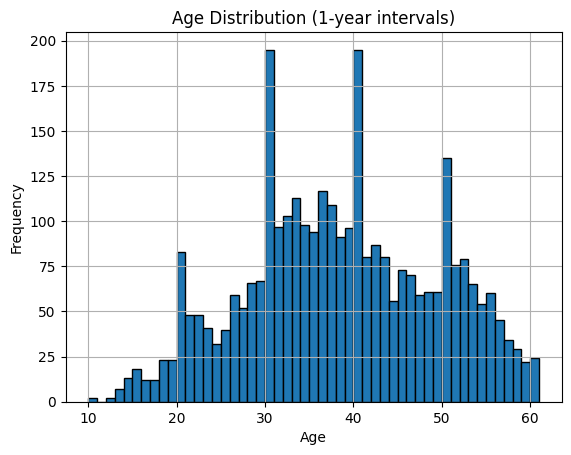

In [3]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df0['Age'].hist(bins=range(int(df0['Age'].min()), int(df0['Age'].max()) + 1), edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('Age Distribution (1-year intervals)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# グラフを表示
plt.show()


In [20]:
df = pd.read_csv('/content/train.csv')

In [16]:
# 'Age'列を文字列型に変換し、NaNを除外する
df = df[df['Age'].notna()]  # NaNを含む行を除外
df['Age'] = df['Age'].astype(str)  # 'Age'列を文字列型に変換

# 代を含む行を削除
df = df[~df['Age'].str.contains('代')]

# その後の処理（年齢の変換など）を続ける
import re

# 変換関数の定義
def convert_age(age_str):
    # 漢数字をアラビア数字に変換
    kanji_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '百': 100, '千': 1000
    }

    # 漢数字の変換
    def kanji_to_num(kanji):
        num = 0
        temp = 0
        for char in kanji:
            if char in kanji_numbers:
                temp += kanji_numbers[char]
            else:
                num += temp
                temp = 0
        return num + temp

    # 年齢の文字列を変換
    age_str = re.sub(r'[歳才際]', '', age_str)  # 歳、才、際を削除
    age_str = re.sub(r'[\u3000-\u303F]', '', age_str)  # 全角数字を半角に
    age_str = re.sub(r'([0-9]+)', r'\1', age_str)  # 半角数字をそのまま
    age_str = re.sub(r'([０-９])', lambda x: str(int(x.group(0))), age_str)  # 全角数字を半角に変換

    # 漢数字の変換
    if re.search(r'[一二三四五六七八九十百千]', age_str):
        age_str = str(kanji_to_num(age_str))

    return int(age_str)

# Age列の変換を実行
df['Age'] = df['Age'].apply(convert_age)

# 統計情報を表示
df['Age'].describe()


<ipython-input-16-50d6a328b6c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(str)  # 'Age'列を文字列型に変換


,Age
count,3018.000000
mean,38.280981
std,10.715499
min,12.000000
25%,31.000000
50%,38.000000
75%,47.000000
max,61.000000


In [17]:
# column1のユニークな値を確認
unique_values = df['Age'].unique()
print("ユニークな値:", unique_values)

# column1の値のカウント
value_counts = df['Age'].value_counts()
print("\n値のカウント:\n", value_counts)

ユニークな値: [50 56 20 48 19 47 49 33 31 51 46 53 25 18 44 30 34 29 41 52 22 36 28 16
 38 42 35 59 17 32 58 54 21 57 37 43 14 26 27 40 24 45 39 55 60 23 13 15
 12 61]

値のカウント:
 Age
36    127
33    123
37    113
34    110
32    105
39    102
31    101
38    101
35    100
42     93
40     91
43     87
41     86
30     82
52     80
51     79
45     77
46     74
28     71
50     70
29     69
53     67
49     65
47     63
48     63
26     63
55     60
44     57
54     56
27     54
21     51
22     49
56     47
23     42
25     42
57     36
20     36
24     36
58     30
59     24
19     24
18     23
15     19
60     16
14     14
16     14
17     13
13      7
61      4
12      2
Name: count, dtype: int64


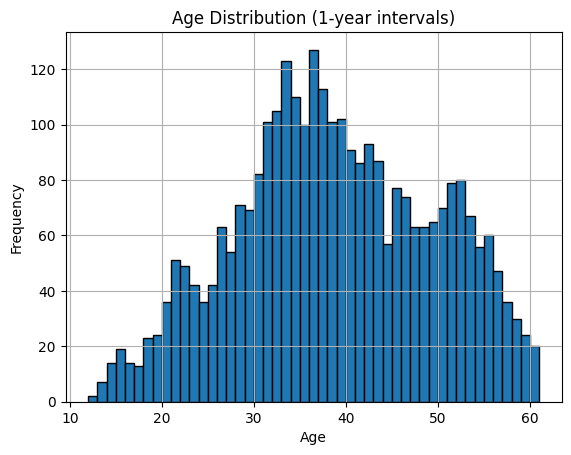

In [18]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df['Age'].hist(bins=range(int(df['Age'].min()), int(df['Age'].max()) + 1), edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('Age Distribution (1-year intervals)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [19]:
dfage = df.copy()

In [22]:
# 'Age'列がNaNでない行のみを処理するため、NaNを除外
df = df[df['Age'].notna()]

# 'Age'列を文字列に変換してから「代」を含む行だけを残す
df_with_dai = df[df['Age'].astype(str).str.contains('代')]

# column1のユニークな値を確認
unique_values = df_with_dai['Age'].unique()
print("ユニークな値:", unique_values)

# column1の値のカウント
value_counts = df_with_dai['Age'].value_counts()
print("\n値のカウント:\n", value_counts)


ユニークな値: ['20代' '30代' '50代' '５０代' '40代' '４０代' '３０代' '60代' '２０代' '10代']

値のカウント:
 Age
30代    116
40代    107
50代     61
20代     48
３０代     12
４０代      9
５０代      6
２０代      6
60代      4
10代      2
Name: count, dtype: int64


In [23]:
import pandas as pd
from scipy import stats

# 年齢範囲ごとの平均・中央値・最頻値を計算する関数
def age_stats(df, age_col, start, end):
    age_range_df = df[(df[age_col] >= start) & (df[age_col] <= end)]
    mean = age_range_df[age_col].mean()
    median = age_range_df[age_col].median()
    mode = age_range_df[age_col].mode()[0]  # 最頻値は最初の1つを取得
    return mean, median, mode

# 各年齢範囲ごとの統計値を計算
age_ranges = [(10, 19), (20, 29), (30, 39), (40, 49), (50, 59), (60, 69)]
age_stats_list = []

for start, end in age_ranges:
    mean, median, mode = age_stats(dfage, 'Age', start, end)
    age_stats_list.append({
        'Age Range': f'{start}〜{end}',
        'Mean': mean,
        'Median': median,
        'Mode': mode
    })

# 結果をDataFrameとして表示
df_age_stats = pd.DataFrame(age_stats_list)
print(df_age_stats)


  Age Range       Mean  Median  Mode
0     10〜19  16.474138    17.0    19
1     20〜29  25.017544    26.0    28
2     30〜39  34.604323    35.0    36
3     40〜49  44.126984    44.0    42
4     50〜59  53.559199    53.0    52
5     60〜69  60.200000    60.0    60


In [35]:
df = pd.read_csv('/content/train.csv')

In [36]:
import re
import pandas as pd
import numpy as np

# 変換関数の定義
def convert_age(age_str):
    if pd.isna(age_str):  # 欠損値の場合
        return 36

    # 漢数字をアラビア数字に変換
    kanji_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '百': 100, '千': 1000
    }

    # 漢数字の変換
    def kanji_to_num(kanji):
        num = 0
        temp = 0
        for char in kanji:
            if char in kanji_numbers:
                temp += kanji_numbers[char]
            else:
                num += temp
                temp = 0
        return num + temp

    # 年齢の文字列を変換
    age_str = re.sub(r'[歳才際]', '', age_str)  # 歳、才、際を削除
    age_str = re.sub(r'[\u3000-\u303F]', '', age_str)  # 全角数字を半角に
    age_str = re.sub(r'([0-9]+)', r'\1', age_str)  # 半角数字をそのまま
    age_str = re.sub(r'([０-９])', lambda x: str(int(x.group(0))), age_str)  # 全角数字を半角に変換

    # 大文字の「24」を変換
   # if '代' in age_str:
    #    age_str = age_str.replace('代', '')

    # 漢数字の変換
    if re.search(r'[一二三四五六七八九十百千]', age_str):
        age_str = str(kanji_to_num(age_str))

    # 年代に応じた年齢に変換
    if '代' in age_str:
        if age_str.startswith('10'):
            return 19
        elif age_str.startswith('20'):
            return 28
        elif age_str.startswith('30'):
            return 36
        elif age_str.startswith('40'):
            return 42
        elif age_str.startswith('50'):
            return 52
        elif age_str.startswith('60'):
            return 60
        else:
            return int(age_str)  # その他の年齢をそのまま返す

    return int(age_str)

# DataFrameのサンプル作成
# df = pd.DataFrame({'Age': [...]})  # 実際のデータフレームをここに指定

# Age列の変換を実行
df['Age'] = df['Age'].apply(convert_age)

# 結果を表示
print(df['Age'].describe())



count    3489.000000
mean       38.373746
std        10.301179
min        12.000000
25%        32.000000
50%        37.000000
75%        46.000000
max        61.000000
Name: Age, dtype: float64


In [37]:

# column1のユニークな値を確認
unique_values = df['Age'].unique()
print("ユニークな値:", unique_values)

# column1の値のカウント
value_counts = df['Age'].value_counts()
print("\n値のカウント:\n", value_counts)


ユニークな値: [50 56 36 20 48 19 47 49 33 31 51 46 53 25 18 28 44 30 34 29 41 52 22 16
 38 42 35 59 17 32 58 54 21 57 37 43 14 26 27 40 24 45 39 55 60 23 13 15
 12 61]

値のカウント:
 Age
36    355
42    209
52    147
28    125
33    123
37    113
34    110
32    105
39    102
38    101
31    101
35    100
40     91
43     87
41     86
30     82
51     79
45     77
46     74
50     70
29     69
53     67
49     65
48     63
26     63
47     63
55     60
44     57
54     56
27     54
21     51
22     49
56     47
23     42
25     42
24     36
57     36
20     36
58     30
19     26
59     24
18     23
60     20
15     19
14     14
16     14
17     13
13      7
61      4
12      2
Name: count, dtype: int64


In [31]:
dfage['Age'].mode()

,Age
0,36


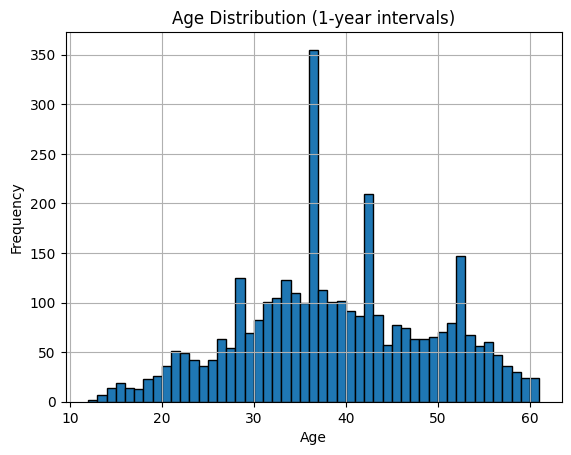

In [38]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df['Age'].hist(bins=range(int(df['Age'].min()), int(df['Age'].max()) + 1), edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('Age Distribution (1-year intervals)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [39]:
df_nan = pd.read_csv('/content/train.csv')

In [40]:
# 欠損値がある行だけを抽出
df_nan = df_nan[df_nan.isna().any(axis=1)]
df_nan

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
2,2,NaN,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
25,25,41歳,Company Invited,2,NaN,Salaried,Male,1.0,3.0,Deluxe,3.0,1,0,4,Manager,303345.0,結婚済み、乗用車なし、子供なし,0
26,26,NaN,Self Enquiry,1,NaN,Salaried,FEMALE,1.0,3.0,deluxe,3.0,1,0,4,Manager,256845.0,独身 車所持 子供なし,0
44,44,33歳,NaN,1,NaN,Salaried,ｆｅｍａｌｅ,1.0,3.0,Deluxe,3.0,1,0,1,Manager,282075.0,結婚済み/車未所持/子供なし,0
88,88,NaN,Self Enquiry,1,9分,Large Business,Male,1.0,3.0,Basic,3.0,1,0,3,Executive,269235.0,"結婚済み,車保有なし,非育児家庭",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,3425,NaN,Self Enquiry,2,15分,Salaried,Male,3.0,3.0,Basıc,5.0,1,0,1,Executive,月収30.0万円,"離婚済み,自家用車あり、子供1人",0
3426,3426,36歳,Self Enquiry,2,NaN,Small Business,Male,3.0,NaN,Delu×e,4.0,3,0,2,Manager,308340.0,独身、自動車所有、こども1人,0
3452,3452,43歳,Self Enquiry,1,NaN,Salaried,Female,4.0,3.0,Deluxe,4.0,年に3回,0,1,Manager,315555.0,離婚済み 自動車未所有 子供有り 1人,0
3467,3467,NaN,Self Enquiry,1,960秒,Small Business,Ｆｅｍａｌｅ,3.0,3.0,deluxe,4.0,年に1回,0,4,Manager,NaN,結婚済み、車保有、子供2人,0


In [41]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283 entries, 2 to 3470
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      283 non-null    int64  
 1   Age                     183 non-null    object 
 2   TypeofContact           277 non-null    object 
 3   CityTier                283 non-null    int64  
 4   DurationOfPitch         162 non-null    object 
 5   Occupation              283 non-null    object 
 6   Gender                  283 non-null    object 
 7   NumberOfPersonVisiting  283 non-null    float64
 8   NumberOfFollowups       250 non-null    float64
 9   ProductPitched          283 non-null    object 
 10  PreferredPropertyStar   283 non-null    float64
 11  NumberOfTrips           261 non-null    object 
 12  Passport                283 non-null    int64  
 13  PitchSatisfactionScore  283 non-null    int64  
 14  Designation             283 non-null    object

In [53]:
df = pd.read_csv('/content/train.csv')
df = df.drop(['id'], axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3206 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3206 non-null   object 
 1   TypeofContact           3206 non-null   object 
 2   CityTier                3206 non-null   int64  
 3   DurationOfPitch         3206 non-null   object 
 4   Occupation              3206 non-null   object 
 5   Gender                  3206 non-null   object 
 6   NumberOfPersonVisiting  3206 non-null   float64
 7   NumberOfFollowups       3206 non-null   float64
 8   ProductPitched          3206 non-null   object 
 9   PreferredPropertyStar   3206 non-null   float64
 10  NumberOfTrips           3206 non-null   object 
 11  Passport                3206 non-null   int64  
 12  PitchSatisfactionScore  3206 non-null   int64  
 13  Designation             3206 non-null   object 
 14  MonthlyIncome           3206 non-null   objec

In [54]:
# 'Age'列を文字列型に変換し、NaNを除外する
df = df[df['Age'].notna()]  # NaNを含む行を除外
df['Age'] = df['Age'].astype(str)  # 'Age'列を文字列型に変換

# 代を含む行を削除
df = df[~df['Age'].str.contains('代')]

# その後の処理（年齢の変換など）を続ける
import re

# 変換関数の定義
def convert_age(age_str):
    # 漢数字をアラビア数字に変換
    kanji_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '百': 100, '千': 1000
    }

    # 漢数字の変換
    def kanji_to_num(kanji):
        num = 0
        temp = 0
        for char in kanji:
            if char in kanji_numbers:
                temp += kanji_numbers[char]
            else:
                num += temp
                temp = 0
        return num + temp

    # 年齢の文字列を変換
    age_str = re.sub(r'[歳才際]', '', age_str)  # 歳、才、際を削除
    age_str = re.sub(r'[\u3000-\u303F]', '', age_str)  # 全角数字を半角に
    age_str = re.sub(r'([0-9]+)', r'\1', age_str)  # 半角数字をそのまま
    age_str = re.sub(r'([０-９])', lambda x: str(int(x.group(0))), age_str)  # 全角数字を半角に変換

    # 漢数字の変換
    if re.search(r'[一二三四五六七八九十百千]', age_str):
        age_str = str(kanji_to_num(age_str))

    return int(age_str)

# Age列の変換を実行
df['Age'] = df['Age'].apply(convert_age)

# 統計情報を表示
df['Age'].describe()


,Age
count,2853.000000
mean,38.373291
std,10.769311
min,12.000000
25%,31.000000
50%,38.000000
75%,47.000000
max,61.000000


In [55]:
## 年齢と月収のNaNは役職に応じて埋める

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2853 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2853 non-null   int64  
 1   TypeofContact           2853 non-null   object 
 2   CityTier                2853 non-null   int64  
 3   DurationOfPitch         2853 non-null   object 
 4   Occupation              2853 non-null   object 
 5   Gender                  2853 non-null   object 
 6   NumberOfPersonVisiting  2853 non-null   float64
 7   NumberOfFollowups       2853 non-null   float64
 8   ProductPitched          2853 non-null   object 
 9   PreferredPropertyStar   2853 non-null   float64
 10  NumberOfTrips           2853 non-null   object 
 11  Passport                2853 non-null   int64  
 12  PitchSatisfactionScore  2853 non-null   int64  
 13  Designation             2853 non-null   object 
 14  MonthlyIncome           2853 non-null   objec

In [57]:
# 変換ルールを定義する
def standardize_designation(designation):
    if pd.isna(designation) or designation is None:
        return None  # Noneのままにする
    # 空白を削除
    designation = designation.strip()

    # 特定の文字列が含まれているかチェック
    if any(sub in designation for sub in ['xe', 'ec', 'cu', 'ut', 'ti', 'iv', 've']):
        return 'Executive'

    # 小文字に変換
    designation = designation.lower()

    # 役職名の変換マッピング
    mapping = {
        'senior manager': 'Senior Manager',
        'manager': 'Manager',
        'avp': 'AVP',
        'avｐ': 'AVP',
        'avｐ': 'AVP',
        'vp': 'VP',
        'vｐ': 'VP',
        'vｐ': 'VP',
        'vp': 'VP',
    }

    # マッピングに基づいて変換
    for key in mapping.keys():
        if key in designation:
            return mapping[key]

    # 'unknown' の条件を追加
    if ' ' in designation:
        return 'Senior Manager'  # 半角スペースが含まれている場合は Senior Manager に変換

    #print(f"Unknown designation: {designation}")  # デバッグ用のログ
    return 'unknown'  # 該当しない場合は'unknown'を返す

# すべての役職に変換を適用
df['Designation'] = df['Designation'].apply(standardize_designation)

# 最後に残った 'unknown' を 'Manager' に変換
df['Designation'] = df['Designation'].replace('unknown', 'Manager')


# 結果を確認
print(df['Designation'].unique())

['Executive' 'Senior Manager' 'AVP' 'Manager' 'VP']


In [58]:
# 月収を整数に変換する関数
def convert_income(income):
    if isinstance(income, str):
        # "月収" と "万円" を取り除き、数値を取得
        if '月収' in income and '万円' in income:
            income = income.replace('月収', '').replace('万円', '').strip()
            return int(float(income) * 10000)  # 万円を円に変換
        else:
            return int(float(income))  # そのまま整数に変換
    return income  # もしすでに数値ならそのまま返す

# 変換を適用
df['MonthlyIncome'] = df['MonthlyIncome'].apply(convert_income)

# 結果を確認
print(df['MonthlyIncome'].unique())

[253905 404475 326805 ... 317340 527910 278190]


In [59]:
df_3 = df.copy()

In [60]:
df_3 = df_3[['Designation','Age','MonthlyIncome']]
df_3.head()

,Designation,Age,MonthlyIncome
0,Executive,50,253905
1,Senior Manager,56,404475
3,Senior Manager,20,326805
4,Executive,48,258435
5,Executive,19,260000


In [61]:
import pandas as pd

# 指定された列に対して統計量を計算
age_stats = df_3.groupby('Designation')['Age'].agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda>': 'mode'})
income_stats = df_3.groupby('Designation')['MonthlyIncome'].agg(['mean', 'median', lambda x: x.mode()[0]]).rename(columns={'<lambda>': 'mode'})

# 結果を結合
stats = pd.concat([age_stats, income_stats], axis=1)
stats.columns = ['Age_mean', 'Age_median', 'Age_mode', 'Income_mean', 'Income_median', 'Income_mode']

# 結果を表示
print(stats)


                 Age_mean  Age_median  Age_mode    Income_mean  Income_median  \
Designation                                                                     
AVP             46.467742        50.0        55  470109.294355       474187.5   
Executive       33.415778        33.0        32  301836.844350       300000.0   
Manager         38.145679        38.0        39  342573.475309       339912.5   
Senior Manager  40.825737        41.0        50  389497.278820       385507.5   
VP              47.360360        51.0        51  477695.855856       500000.0   

                Income_mode  
Designation                  
AVP                  500000  
Executive            300000  
Manager              300000  
Senior Manager       400000  
VP                   500000  


In [62]:
df_rank = pd.read_csv('/content/train.csv')
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3389 non-null   object 
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [63]:
# 変換ルールを定義する
def standardize_designation(designation):
    if pd.isna(designation) or designation is None:
        return None  # Noneのままにする
    # 空白を削除
    designation = designation.strip()

    # 特定の文字列が含まれているかチェック
    if any(sub in designation for sub in ['xe', 'ec', 'cu', 'ut', 'ti', 'iv', 've']):
        return 'Executive'

    # 小文字に変換
    designation = designation.lower()

    # 役職名の変換マッピング
    mapping = {
        'senior manager': 'Senior Manager',
        'manager': 'Manager',
        'avp': 'AVP',
        'avｐ': 'AVP',
        'avｐ': 'AVP',
        'vp': 'VP',
        'vｐ': 'VP',
        'vｐ': 'VP',
        'vp': 'VP',
    }

    # マッピングに基づいて変換
    for key in mapping.keys():
        if key in designation:
            return mapping[key]

    # 'unknown' の条件を追加
    if ' ' in designation:
        return 'Senior Manager'  # 半角スペースが含まれている場合は Senior Manager に変換

    #print(f"Unknown designation: {designation}")  # デバッグ用のログ
    return 'unknown'  # 該当しない場合は'unknown'を返す

# すべての役職に変換を適用
df_rank['Designation'] = df_rank['Designation'].apply(standardize_designation)

# 最後に残った 'unknown' を 'Manager' に変換
df_rank['Designation'] = df_rank['Designation'].replace('unknown', 'Manager')


# 結果を確認
print(df_rank['Designation'].unique())

['Executive' 'Senior Manager' 'AVP' 'Manager' 'VP']


In [64]:
import pandas as pd

# 欠損値を埋めるための辞書を作成
fill_values = {
    'Executive': {'Age': 33, 'MonthlyIncome': 300000},
    'Manager': {'Age': 38, 'MonthlyIncome': 340000},
    'Senior Manager': {'Age': 41, 'MonthlyIncome': 390000},
    'AVP': {'Age': 50, 'MonthlyIncome': 480000},
    'VP': {'Age': 51, 'MonthlyIncome': 500000}
}

# 各役職ごとに欠損値を埋める
for designation, values in fill_values.items():
    df_rank.loc[df_rank['Designation'] == designation, 'Age'] = df_rank.loc[df_rank['Designation'] == designation, 'Age'].fillna(values['Age'])
    df_rank.loc[df_rank['Designation'] == designation, 'MonthlyIncome'] = df_rank.loc[df_rank['Designation'] == designation, 'MonthlyIncome'].fillna(values['MonthlyIncome'])

# 結果を表示
print(df_rank)


        id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0        0   50歳     Self Enquiry         2            900秒  Large Business   
1        1   56歳  Company Invited         1             14分        Salaried   
2        2    33     Self Enquiry         1             10分  Large Business   
3        3  三十七歳     Self Enquiry         2           1080秒  Small Business   
4        4   48歳  Company Invited         3           1020秒  Small Business   
...    ...   ...              ...       ...             ...             ...   
3484  3484   40歳     Self Enquiry         2           1560秒        Salaried   
3485  3485   40代     Self Enquiry         1              9分  Large Business   
3486  3486   31歳     Self Enquiry         1            840秒  Small Business   
3487  3487   56歳  Company Invited         2            900秒        Salaried   
3488  3488   42歳     Self Enquiry         1              9分  Small Business   

      Gender  NumberOfPersonVisiting  NumberOfFollo

In [65]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3489 non-null   object 
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [68]:
import re
import pandas as pd
import numpy as np

# 変換関数の定義
def convert_age(age_str):
    if pd.isna(age_str):  # 欠損値の場合
        return 36

    if not isinstance(age_str, str):  # 文字列でない場合
        return int(age_str) if pd.notna(age_str) else 36  # 数値の場合はそのまま返すか、NaNの場合は36を返す

    # 漢数字をアラビア数字に変換
    kanji_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '百': 100, '千': 1000
    }

    # 漢数字の変換
    def kanji_to_num(kanji):
        num = 0
        temp = 0
        for char in kanji:
            if char in kanji_numbers:
                temp += kanji_numbers[char]
            else:
                num += temp
                temp = 0
        return num + temp

    # 年齢の文字列を変換
    age_str = re.sub(r'[歳才際]', '', age_str)  # 歳、才、際を削除
    age_str = re.sub(r'[\u3000-\u303F]', '', age_str)  # 全角数字を半角に
    age_str = re.sub(r'([0-9]+)', r'\1', age_str)  # 半角数字をそのまま
    age_str = re.sub(r'([０-９])', lambda x: str(int(x.group(0))), age_str)  # 全角数字を半角に変換

    # 漢数字の変換
    if re.search(r'[一二三四五六七八九十百千]', age_str):
        age_str = str(kanji_to_num(age_str))

    # 年代に応じた年齢に変換
    if '代' in age_str:
        if age_str.startswith('10'):
            return 19
        elif age_str.startswith('20'):
            return 28
        elif age_str.startswith('30'):
            return 36
        elif age_str.startswith('40'):
            return 42
        elif age_str.startswith('50'):
            return 52
        elif age_str.startswith('60'):
            return 60
        else:
            return int(age_str)  # その他の年齢をそのまま返す

    return int(age_str)

# DataFrameのサンプル作成
# df_rank = pd.DataFrame({'Age': [...]})  # 実際のデータフレームをここに指定

# Age列の変換を実行
df_rank['Age'] = df_rank['Age'].apply(convert_age)

# DataFrameの情報を表示
df_rank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3489 non-null   int64  
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

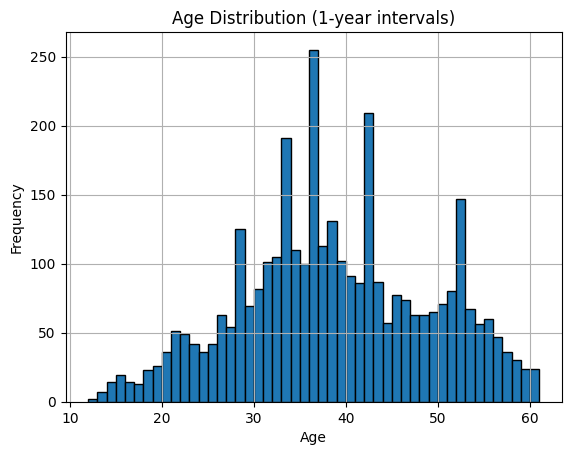

In [69]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df_rank['Age'].hist(bins=range(int(df_rank['Age'].min()), int(df_rank['Age'].max()) + 1), edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('Age Distribution (1-year intervals)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [70]:
# 月収を整数に変換する関数
def convert_income(income):
    if isinstance(income, str):
        # "月収" と "万円" を取り除き、数値を取得
        if '月収' in income and '万円' in income:
            income = income.replace('月収', '').replace('万円', '').strip()
            return int(float(income) * 10000)  # 万円を円に変換
        else:
            return int(float(income))  # そのまま整数に変換
    return income  # もしすでに数値ならそのまま返す

# 変換を適用
df_rank['MonthlyIncome'] = df_rank['MonthlyIncome'].apply(convert_income)

# 結果を確認
print(df_rank['MonthlyIncome'].unique())

[253905 404475 278145 ... 317340 527910 278190]


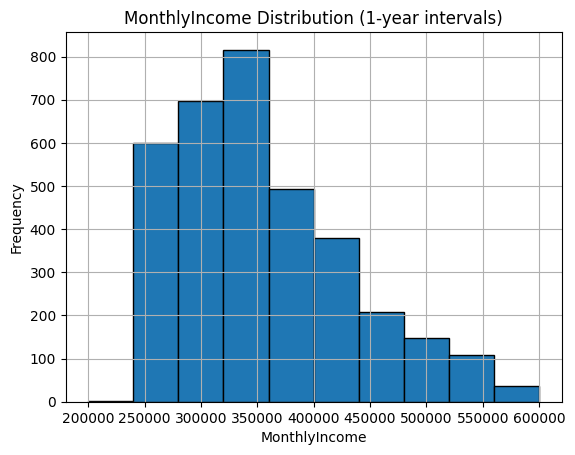

In [74]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df_rank['MonthlyIncome'].hist(bins=10, edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('MonthlyIncome Distribution (1-year intervals)')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [75]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3489 non-null   int64  
 2   TypeofContact           3483 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3368 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3456 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3467 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [78]:
df_train = pd.read_csv('/content/df_train_3489.csv')

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3489 non-null   int64  
 1   id                      3489 non-null   int64  
 2   Age                     3489 non-null   int64  
 3   TypeofContact           3489 non-null   float64
 4   CityTier                3489 non-null   int64  
 5   DurationOfPitch         3489 non-null   int64  
 6   Occupation              3489 non-null   float64
 7   Gender                  3489 non-null   float64
 8   NumberOfPersonVisiting  3489 non-null   float64
 9   NumberOfFollowups       3489 non-null   float64
 10  ProductPitched          3489 non-null   float64
 11  PreferredPropertyStar   3489 non-null   float64
 12  NumberOfTrips           3489 non-null   int64  
 13  Passport                3489 non-null   int64  
 14  PitchSatisfactionScore  3489 non-null   

In [81]:
# df_rankのAgeとMonthlyIncomeをdf_trainのAgeとMonthlyIncomeに置き換え
df_train['Age'] = df_rank['Age']
df_train['MonthlyIncome'] = df_rank['MonthlyIncome']



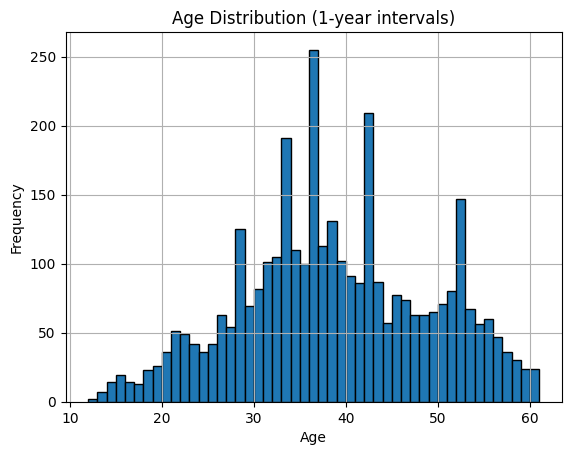

In [82]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df_train['Age'].hist(bins=range(int(df_train['Age'].min()), int(df_train['Age'].max()) + 1), edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('Age Distribution (1-year intervals)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

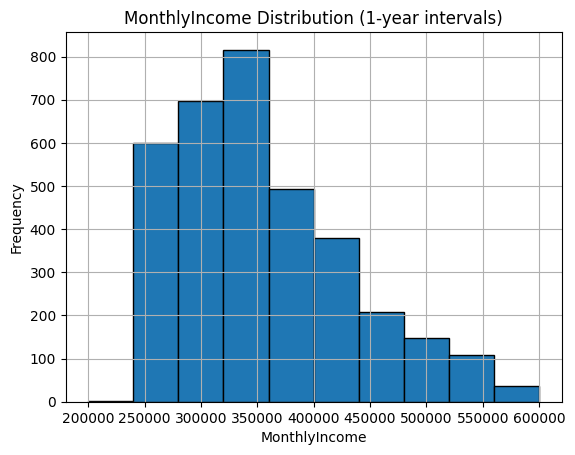

In [83]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df_train['MonthlyIncome'].hist(bins=10, edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('MonthlyIncome Distribution (1-year intervals)')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [85]:
df_train = df_train.drop('Unnamed: 0', axis=1)

In [86]:
df_train.to_csv('df_train_ageIncome')

In [87]:
df_t = pd.read_csv('/content/test.csv')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3396 non-null   object 
 2   TypeofContact           3477 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3358 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3465 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3447 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [88]:
# 変換ルールを定義する
def standardize_designation(designation):
    if pd.isna(designation) or designation is None:
        return None  # Noneのままにする
    # 空白を削除
    designation = designation.strip()

    # 特定の文字列が含まれているかチェック
    if any(sub in designation for sub in ['xe', 'ec', 'cu', 'ut', 'ti', 'iv', 've']):
        return 'Executive'

    # 小文字に変換
    designation = designation.lower()

    # 役職名の変換マッピング
    mapping = {
        'senior manager': 'Senior Manager',
        'manager': 'Manager',
        'avp': 'AVP',
        'avｐ': 'AVP',
        'avｐ': 'AVP',
        'vp': 'VP',
        'vｐ': 'VP',
        'vｐ': 'VP',
        'vp': 'VP',
    }

    # マッピングに基づいて変換
    for key in mapping.keys():
        if key in designation:
            return mapping[key]

    # 'unknown' の条件を追加
    if ' ' in designation:
        return 'Senior Manager'  # 半角スペースが含まれている場合は Senior Manager に変換

    #print(f"Unknown designation: {designation}")  # デバッグ用のログ
    return 'unknown'  # 該当しない場合は'unknown'を返す

# すべての役職に変換を適用
df_t['Designation'] = df_t['Designation'].apply(standardize_designation)

# 最後に残った 'unknown' を 'Manager' に変換
df_t['Designation'] = df_t['Designation'].replace('unknown', 'Manager')


# 結果を確認
print(df_t['Designation'].unique())

['AVP' 'Senior Manager' 'Executive' 'Manager' 'VP']


In [89]:
import pandas as pd

# 欠損値を埋めるための辞書を作成
fill_values = {
    'Executive': {'Age': 33, 'MonthlyIncome': 300000},
    'Manager': {'Age': 38, 'MonthlyIncome': 340000},
    'Senior Manager': {'Age': 41, 'MonthlyIncome': 390000},
    'AVP': {'Age': 50, 'MonthlyIncome': 480000},
    'VP': {'Age': 51, 'MonthlyIncome': 500000}
}

# 各役職ごとに欠損値を埋める
for designation, values in fill_values.items():
    df_t.loc[df_t['Designation'] == designation, 'Age'] = df_t.loc[df_t['Designation'] == designation, 'Age'].fillna(values['Age'])
    df_t.loc[df_t['Designation'] == designation, 'MonthlyIncome'] = df_t.loc[df_t['Designation'] == designation, 'MonthlyIncome'].fillna(values['MonthlyIncome'])

# 結果を表示
print(df_t)

        id  Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0     3489  ４８歳     Self Enquiry         2             13分  Small Business   
1     3490  30代     Self Enquiry         2             12分  Small Business   
2     3491  25歳     Self Enquiry         1            540秒        Salaried   
3     3492  21歳  Company Invited         2            420秒        Salaried   
4     3493  41歳  Company Invited         1              7分        Salaried   
...    ...  ...              ...       ...             ...             ...   
3484  6973  41歳  Company Invited         1             14分  Small Business   
3485  6974  44歳  Company Invited         1             35分        Salaried   
3486  6975  24歳     Self Enquiry         2             21分  Small Business   
3487  6976  25歳     Self Enquiry         1              9分  Small Business   
3488  6977  44才     Self Enquiry         1            480秒  Small Business   

      Gender  NumberOfPersonVisiting  NumberOfFollowups Product

In [90]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3489 non-null   object 
 2   TypeofContact           3477 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3358 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3465 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3447 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [91]:
import re
import pandas as pd
import numpy as np

# 変換関数の定義
def convert_age(age_str):
    if pd.isna(age_str):  # 欠損値の場合
        return 36

    if not isinstance(age_str, str):  # 文字列でない場合
        return int(age_str) if pd.notna(age_str) else 36  # 数値の場合はそのまま返すか、NaNの場合は36を返す

    # 漢数字をアラビア数字に変換
    kanji_numbers = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
        '百': 100, '千': 1000
    }

    # 漢数字の変換
    def kanji_to_num(kanji):
        num = 0
        temp = 0
        for char in kanji:
            if char in kanji_numbers:
                temp += kanji_numbers[char]
            else:
                num += temp
                temp = 0
        return num + temp

    # 年齢の文字列を変換
    age_str = re.sub(r'[歳才際]', '', age_str)  # 歳、才、際を削除
    age_str = re.sub(r'[\u3000-\u303F]', '', age_str)  # 全角数字を半角に
    age_str = re.sub(r'([0-9]+)', r'\1', age_str)  # 半角数字をそのまま
    age_str = re.sub(r'([０-９])', lambda x: str(int(x.group(0))), age_str)  # 全角数字を半角に変換

    # 漢数字の変換
    if re.search(r'[一二三四五六七八九十百千]', age_str):
        age_str = str(kanji_to_num(age_str))

    # 年代に応じた年齢に変換
    if '代' in age_str:
        if age_str.startswith('10'):
            return 19
        elif age_str.startswith('20'):
            return 28
        elif age_str.startswith('30'):
            return 36
        elif age_str.startswith('40'):
            return 42
        elif age_str.startswith('50'):
            return 52
        elif age_str.startswith('60'):
            return 60
        else:
            return int(age_str)  # その他の年齢をそのまま返す

    return int(age_str)

# DataFrameのサンプル作成
# df_rank = pd.DataFrame({'Age': [...]})  # 実際のデータフレームをここに指定

# Age列の変換を実行
df_t['Age'] = df_t['Age'].apply(convert_age)

# DataFrameの情報を表示
df_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3489 non-null   int64  
 2   TypeofContact           3477 non-null   object 
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3358 non-null   object 
 5   Occupation              3489 non-null   object 
 6   Gender                  3489 non-null   object 
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3465 non-null   float64
 9   ProductPitched          3489 non-null   object 
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3447 non-null   object 
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

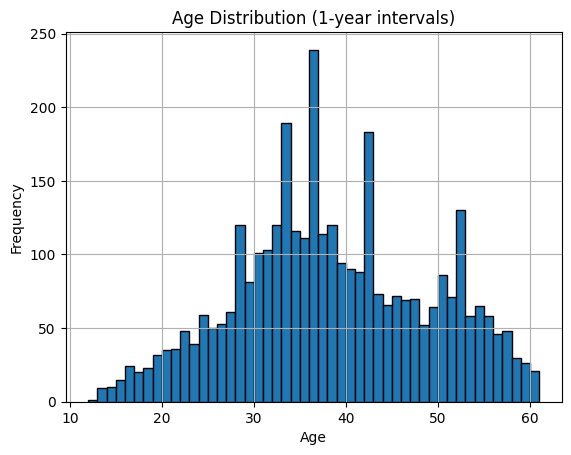

In [100]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df_test['Age'].hist(bins=range(int(df_t['Age'].min()), int(df_t['Age'].max()) + 1), edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('Age Distribution (1-year intervals)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [93]:
# 月収を整数に変換する関数
def convert_income(income):
    if isinstance(income, str):
        # "月収" と "万円" を取り除き、数値を取得
        if '月収' in income and '万円' in income:
            income = income.replace('月収', '').replace('万円', '').strip()
            return int(float(income) * 10000)  # 万円を円に変換
        else:
            return int(float(income))  # そのまま整数に変換
    return income  # もしすでに数値ならそのまま返す

# 変換を適用
df_t['MonthlyIncome'] = df_t['MonthlyIncome'].apply(convert_income)

# 結果を確認
print(df_t['MonthlyIncome'].unique())

[496950 300000 260000 ... 349770 272430 411795]


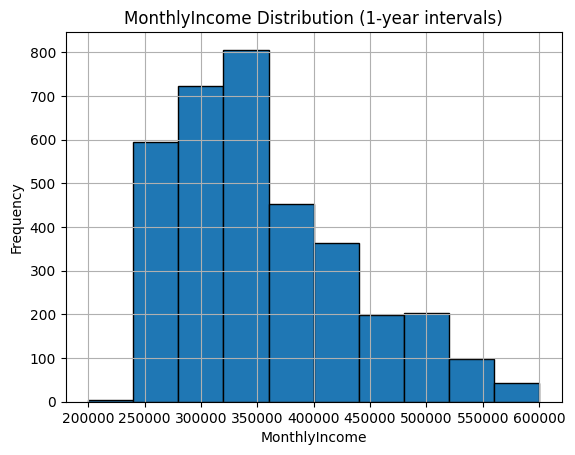

In [101]:
import matplotlib.pyplot as plt

# 1歳刻みのヒストグラムを作成
df_test['MonthlyIncome'].hist(bins=10, edgecolor='black')

# グラフのタイトルとラベルを設定
plt.title('MonthlyIncome Distribution (1-year intervals)')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')

# グラフを表示
plt.show()

In [95]:
df_t.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info
0,3489,48,Self Enquiry,2,13分,Small Business,Male,1.0,4.0,Super De|uxe,3.0,7,0,3,AVP,496950,結婚済み 車所持 子供なし
1,3490,36,Self Enquiry,2,12分,Small Business,Ｆｅｍａｌｅ,1.0,4.0,Standard,3.0,4,1,3,Senior Manager,300000,結婚済み、車未所持、子供なし
2,3491,25,Self Enquiry,1,540秒,Salaried,Female,1.0,4.0,Basic,3.0,1,0,3,Executive,260000,離婚済み、自動車未所有、子供なし
3,3492,21,Company Invited,2,420秒,Salaried,Male,1.0,4.0,Basic,4.0,1,0,3,Senior Manager,259875,離婚済み、自動車所有、子供なし
4,3493,41,Company Invited,1,7分,Salaried,MALE,1.0,4.0,Basic,3.0,1,0,4,Executive,268830,独身/車所持／子供なし


In [97]:
df_test = pd.read_csv('/content/df_test.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,結婚,車,子供の数
0,3489,48,0.11610,2,780,0.153699,0.165172,1.0,4.0,0.089041,3.0,7,0,3,0.070423,496950,結婚済み 車所持 子供なし,0.094192,0.116883,0
1,3490,30,0.11610,2,720,0.153699,0.100686,1.0,4.0,0.089286,3.0,4,1,3,0.086595,300000,結婚済み、車未所持、子供なし,0.094192,0.153927,0
2,3491,25,0.11610,1,540,0.098926,0.100686,1.0,4.0,0.297143,3.0,1,0,3,0.302392,260000,離婚済み、自動車未所有、子供なし,0.116193,0.153927,0
3,3492,21,0.17907,2,420,0.098926,0.165172,1.0,4.0,0.297143,4.0,1,0,3,0.086595,259875,離婚済み、自動車所有、子供なし,0.116193,0.153927,0
4,3493,41,0.17907,1,420,0.098926,0.165172,1.0,4.0,0.297143,3.0,1,0,4,0.302392,268830,独身/車所持／子供なし,0.205699,0.116883,0


In [98]:
# df_rankのAgeとMonthlyIncomeをdf_trainのAgeとMonthlyIncomeに置き換え
df_test['Age'] = df_t['Age']
df_test['MonthlyIncome'] = df_t['MonthlyIncome']



In [99]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3489 non-null   int64  
 1   Age                     3489 non-null   int64  
 2   TypeofContact           3489 non-null   float64
 3   CityTier                3489 non-null   int64  
 4   DurationOfPitch         3489 non-null   int64  
 5   Occupation              3489 non-null   float64
 6   Gender                  3489 non-null   float64
 7   NumberOfPersonVisiting  3489 non-null   float64
 8   NumberOfFollowups       3489 non-null   float64
 9   ProductPitched          3489 non-null   float64
 10  PreferredPropertyStar   3489 non-null   float64
 11  NumberOfTrips           3489 non-null   int64  
 12  Passport                3489 non-null   int64  
 13  PitchSatisfactionScore  3489 non-null   int64  
 14  Designation             3489 non-null   

In [102]:
df_test.to_csv('df_test_ageIncome')